In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





import Data



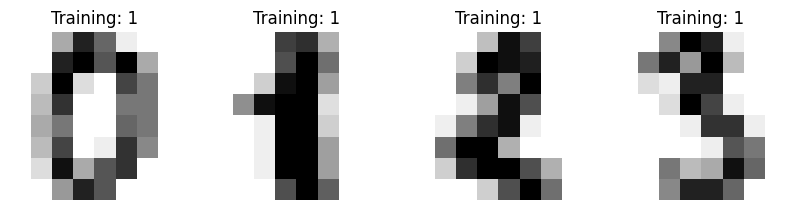

In [12]:
from sklearn.datasets import load_digits

df = load_digits()

_ , axes = plt.subplots (nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow (image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [13]:
df.images.shape

(1797, 8, 8)

In [14]:
df. images [0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
df.images [0].shape

(8, 8)

In [16]:
len (df.images)

1797

In [18]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [19]:
data[0].shape

(64,)

In [20]:
data.shape

(1797, 64)

scalling img data


In [23]:
data.min()






0.0

In [24]:
data.max()

1.0

In [25]:

data= data/16


In [26]:
data.min()


0.0

In [27]:
data.max()

0.0625

In [28]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

train test spilt data

In [36]:
from sklearn.model_selection import train_test_split



In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
((1257, 64), (540, 64), (1257,), (540,))

((1257, 64), (540, 64), (1257,), (540,))

Random forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
rf = RandomForestClassifier()

In [40]:
rf.fit(X_train, y_train)


RandomForestClassifier()

predict test data

In [42]:
y_pred =  rf.predict(X_test)


In [43]:
y_pred

array([0, 4, 0, 1, 8, 3, 4, 4, 1, 3, 4, 8, 5, 7, 8, 6, 7, 1, 8, 6, 9, 7,
       6, 5, 5, 9, 3, 9, 3, 7, 4, 9, 5, 1, 2, 2, 1, 3, 8, 7, 4, 2, 6, 4,
       3, 4, 7, 9, 6, 2, 8, 7, 5, 9, 5, 3, 5, 2, 8, 4, 8, 6, 3, 3, 3, 0,
       1, 9, 1, 2, 0, 5, 7, 7, 4, 4, 3, 4, 2, 2, 6, 8, 4, 2, 9, 4, 5, 0,
       9, 5, 8, 9, 7, 3, 5, 6, 4, 3, 8, 3, 7, 9, 8, 0, 9, 2, 9, 8, 2, 5,
       3, 7, 3, 9, 7, 5, 2, 4, 8, 2, 6, 0, 3, 3, 2, 6, 8, 7, 2, 5, 0, 8,
       4, 6, 0, 6, 7, 6, 2, 2, 3, 5, 9, 7, 2, 2, 8, 7, 9, 1, 4, 1, 8, 3,
       8, 7, 1, 1, 9, 4, 4, 8, 7, 8, 6, 5, 9, 4, 6, 8, 1, 3, 3, 6, 1, 1,
       6, 0, 4, 5, 9, 1, 2, 9, 5, 1, 3, 9, 1, 0, 6, 9, 0, 1, 2, 3, 8, 4,
       7, 4, 9, 4, 3, 1, 1, 8, 7, 6, 4, 8, 6, 9, 0, 8, 5, 7, 5, 1, 5, 4,
       2, 4, 2, 5, 6, 6, 6, 5, 7, 8, 8, 1, 6, 7, 9, 9, 4, 4, 3, 2, 9, 8,
       5, 8, 5, 2, 0, 4, 0, 5, 2, 7, 7, 2, 4, 0, 2, 2, 0, 7, 1, 3, 1, 0,
       7, 2, 9, 4, 6, 5, 5, 9, 9, 0, 9, 3, 7, 1, 3, 5, 0, 1, 7, 7, 3, 1,
       4, 3, 5, 2, 9, 4, 7, 4, 7, 3, 5, 9, 4, 5, 7,

model accuracy

In [44]:
from sklearn.metrics import confusion_matrix, classification_report


In [45]:
confusion_matrix(y_test, y_pred)

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 60,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 56,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1, 51,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 53]])

In [46]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        56
           3       0.98      0.95      0.97        60
           4       0.98      0.98      0.98        61
           5       0.95      0.97      0.96        58
           6       0.98      1.00      0.99        46
           7       0.93      1.00      0.96        53
           8       1.00      0.94      0.97        54
           9       0.98      0.96      0.97        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

